In [5]:
import numpy as np # linear algebra
import pandas as pd

In [55]:
column_names = ["Category", "Description"] 

data = pd.read_csv('/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv',header=None, names=column_names)
data

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [56]:
value_counts = data['Category'].value_counts()
print(value_counts)

Category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [57]:
df = data.sample(1000)

In [58]:
df['Category'].value_counts()

Category
Household                 375
Books                     228
Electronics               227
Clothing & Accessories    170
Name: count, dtype: int64

In [10]:
sen = df['Description'].tolist()

In [11]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')


def get_word_embeddings(text):
    encoded_input = tokenizer(text, return_tensors="tf", padding="max_length", truncation=True)
    output = model(encoded_input)[0]
    word_embeddings = output[:, 1:-1, :] 
    return word_embeddings.numpy()


word_embeddings_list = []
i = 0
for s in sen:
    print(i, end=' ')
    word_embeddings = get_word_embeddings(s)
    word_embeddings_list.append(word_embeddings)
    i+=1

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [12]:
print(len(word_embeddings_list))

1000


In [13]:
print(len(word_embeddings_list[0]))
word_embeddings_list[0]

1


array([[[ 0.51456916,  0.02471806,  0.11431771, ...,  0.47509792,
          0.7671675 ,  0.32859164],
        [-0.44984764, -0.7525779 , -0.17171216, ...,  0.3045698 ,
         -0.1277186 ,  0.1747061 ],
        [ 0.06431894, -0.17989126,  0.80776477, ..., -0.25075614,
          0.21219373, -0.5827756 ],
        ...,
        [-0.10988699, -0.0222828 ,  0.28600198, ..., -0.0295254 ,
         -0.17445037,  0.29112962],
        [-0.12337516, -0.35144302,  0.2597158 , ...,  0.10348018,
         -0.03657822,  0.20595834],
        [ 0.15001011, -0.53309584,  0.27763945, ...,  0.12418752,
         -0.07545435, -0.08335125]]], dtype=float32)

In [14]:
print(len(word_embeddings_list[7][0]))
word_embeddings_list[0][0]

510


array([[ 0.51456916,  0.02471806,  0.11431771, ...,  0.47509792,
         0.7671675 ,  0.32859164],
       [-0.44984764, -0.7525779 , -0.17171216, ...,  0.3045698 ,
        -0.1277186 ,  0.1747061 ],
       [ 0.06431894, -0.17989126,  0.80776477, ..., -0.25075614,
         0.21219373, -0.5827756 ],
       ...,
       [-0.10988699, -0.0222828 ,  0.28600198, ..., -0.0295254 ,
        -0.17445037,  0.29112962],
       [-0.12337516, -0.35144302,  0.2597158 , ...,  0.10348018,
        -0.03657822,  0.20595834],
       [ 0.15001011, -0.53309584,  0.27763945, ...,  0.12418752,
        -0.07545435, -0.08335125]], dtype=float32)

In [15]:
print(len(word_embeddings_list[0][0][0]))
word_embeddings_list[0][0][0]

768


array([ 5.14569163e-01,  2.47180592e-02,  1.14317708e-01,  1.28160983e-01,
       -1.27064884e-01,  2.23383546e-01,  5.43526188e-02,  2.38854364e-01,
        5.01415730e-01, -2.23867565e-01, -3.57260443e-02, -4.17552084e-01,
        2.84780823e-02,  4.61485565e-01, -6.15587056e-01, -5.76456450e-02,
        1.39942989e-01,  1.67196363e-01,  1.96534127e-01,  4.01196659e-01,
       -3.05930197e-01, -4.32714760e-01, -7.04461187e-02,  1.03411719e-01,
       -1.94378570e-03,  1.72930151e-01, -1.14090398e-01,  3.99646461e-01,
        1.92443937e-01, -4.13161904e-01,  9.98473167e-02,  6.81587011e-02,
       -5.24828024e-02, -2.64756918e-01, -8.54907930e-01, -5.08076012e-01,
       -7.27321923e-01,  2.07539573e-01,  3.80776525e-01, -2.67609924e-01,
        7.78564572e-01, -3.90195400e-01,  3.77267957e-01,  3.51070940e-01,
        2.86094695e-01, -2.47780867e-02, -6.42448664e-01, -5.30438542e-01,
       -1.14852726e-01, -6.66834354e-01, -3.02826874e-02, -4.17756587e-02,
       -1.34745911e-01, -

In [20]:
len(word_embeddings_list), len(word_embeddings_list[0]), len(word_embeddings_list[0][0]), len(word_embeddings_list[0][0][0])

(1000, 1, 510, 768)

In [88]:
word_embeddings_list[0].shape

(1, 510, 768)

In [28]:
for i in range(len(word_embeddings_list)):
    print(i, end=' ')
    for j in range(len(word_embeddings_list[i][0])):
        for k in range(len(word_embeddings_list[i][0][j])):
            word_embeddings_list[i][0][j][k] *= 255
            
print()

# Print the modified nested list
print("Modified 3D nested list:")
for i in range(len(word_embeddings_list[0])):
    print("Layer", i + 1)
    for j in range(len(word_embeddings_list[i])):
        print(word_embeddings_list[i][j])
    print()


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

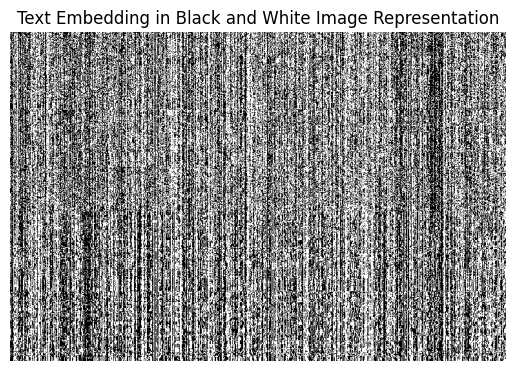

In [32]:
import matplotlib.pyplot as plt

# Extract the first 2D sub-matrix
first_2d_sub_matrix = word_embeddings_list[4][0]

# Convert grayscale values to black and white
bw_image = np.array(first_2d_sub_matrix) >= 127.5

# Display the black and white image using matplotlib
plt.imshow(bw_image, cmap='binary')
plt.title('Text Embedding in Black and White Image Representation')
plt.axis('off')  # Turn off axis
plt.show()

In [48]:
df

,Category,Description
14580,Household,AO Smith X8 9-Litre Green RO Series Water Puri...
3502,Household,Planters Artificial Bamboo Plants & White Pear...
7112,Household,ANSIO Polyester Shower Curtain for Bathroom - ...
42910,Electronics,"HP 18.5 inch (46.9 cm) LED Monitor - HD, TN Pa..."
24883,Books,From Stonehenge to Samarkand: An Anthology of ...
...,...,...
26468,Books,Analysis of Investments and Management of Port...
7590,Household,"AmazonBasics Wood Suit Hangers - 30 Pack, Natu..."
36296,Clothing & Accessories,ALC Creation Women's Crepe A-Line Kurti This i...
22747,Books,BCECE (Bihar Polytechnic Sanyukt Pravesh Parik...


In [62]:


# Use factorize to convert categorical values to numerical formats
df['category_numerical'] = pd.factorize(df['Category'])[0] + 1

df


,Category,Description,Numerical_Value,category_numerical
4380,Household,Hello Dream Set of 3 Small (13cm/11cm/8cm) Cut...,2,1
19118,Household,"Stanley 1-92-905 Tools Storage Box, Black, 410...",2,1
20529,Books,How to Build a Car: The Autobiography of the W...,3,2
49802,Electronics,MUSTTALK Bluetooth Smartwatch with Camera and ...,5,3
41859,Electronics,TP-Link EAP110 300Mbps Wireless and Ceiling Mo...,5,3
...,...,...,...,...
37700,Clothing & Accessories,MomToBe Women's Rayon Maternity Kurti MomToBe ...,Clothing & Accessories,4
47279,Electronics,Hikvision DS-2CE1AD0T-IRP 2MP 1080P Full HD Ni...,5,3
7568,Household,AmazonBasics Velvet Shirt/Dress Hangers - Blac...,2,1
1818,Household,@home by Nilkamal Fern 6 Seater Dining Table S...,2,1


In [91]:
y = df['category_numerical'].tolist()

# Convert word embeddings list and target labels to numpy arrays
X_train = np.array(word_embeddings_list)
y_train = np.array(y)

X_train.shape, y_train.shape

((1000, 1, 510, 768), (1000,))

In [94]:
X_train = np.transpose(X_train, (0, 2, 1))
X_train.shape

(1000, 768, 510)

In [96]:
import tensorflow as tf
from tensorflow.keras import layers, models


  # Remove the batch dimension
X_train = X_train.transpose((0, 2, 1))  # Transpose to shape (num_samples, sequence_length, embedding_size)

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(510, 768)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming you have 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # You can adjust epochs and batch size as per your need


Epoch 1/10
 7/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2043 - loss: 409879.8125 

I0000 00:00:1709578869.078505     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.2623 - loss: 40951779328.0000 - val_accuracy: 0.3950 - val_loss: 1756.6924
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3279 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: nan

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Embedding, Flatten

# Assuming the shape of your word embeddings is (num_samples, max_sequence_length, embedding_dim)
# Adjust these values according to your actual embeddings
max_sequence_length = 510  # Max sequence length
embedding_dim = 768  # Embedding dimension
num_classes = 4

# Convert the DataFrame to numpy arrays
X = word_embeddings_list
y = np.array(df['category_numerical'])

In [80]:
len(X), len(y)

(1000, 1000)

In [81]:


# Define the CNN model
model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(max_sequence_length, embedding_dim)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes is the number of categories you have
])



In [84]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.0)



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 506, 128)       │       491,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,164 (1.91 MB)

 Trainable params: 500,164 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
'y' sizes: 1000


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
!pip install deepspeech